In [1]:
%load_ext autoreload

%autoreload 2

import gpytorch
from models_util import load_combined_model, test_model, test_model_with_rejection, test_cnn_model, test_cnn_model_with_rejection, compare_rejection_models
from data_util import get_data_loader#, read_data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pylab
# from keras.models import load_model
# import torchvision.transforms as transforms
# import torchvision.datasets as dset
# import torch

In [2]:
cnn_model = load_model('models/CNN_mnist_model.h5')

## GP Model

In [2]:
model, likelihood = load_combined_model('models/gp_mnist2.dat')

## AWGN Data

### Standard

In [3]:
test_loader = get_data_loader('data/mnist-with-awgn.mat')

with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_awgn_var, wrong_awgn_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 9471/10000 (94%)


In [4]:
print("Correct average variance is {}".format(correct_awgn_var.mean()))
print("Wrong average variance is {}".format(wrong_awgn_var.mean()))

Correct average variance is 0.011881809681653976
Wrong average variance is 0.06882140785455704


In [10]:
correct_cnn_awgn_var, wrong_cnn_awgn_var = test_cnn_model(cnn_model, 'data/mnist-with-awgn.mat')

CNN Test accuracy: 0.9207


In [11]:
print("Correct CNN average variance is {}".format(correct_cnn_awgn_var.mean()))
print("Wrong CNN average variance is {}".format(wrong_cnn_awgn_var.mean()))

Correct CNN average variance is 0.007004745304584503
Wrong CNN average variance is 0.002199931535869837


### With Rejection

In [4]:
awgn_cnn_scores, awgn_gp_scores = compare_rejection_models('data/mnist-with-awgn.mat', cnn_model, model, likelihood)

Penalty: 1
GP test set: Score: 7413 on 10000 samples
CNN Test Score: 8414


Penalty: 3
GP test set: Score: 7373 on 10000 samples
CNN Test Score: 6828


Penalty: 5
GP test set: Score: 7341 on 10000 samples
CNN Test Score: 5242


Penalty: 7
GP test set: Score: 7255 on 10000 samples
CNN Test Score: 3656


Penalty: 9
GP test set: Score: 7179 on 10000 samples
CNN Test Score: 2070




## Motion Blur  Data

### Standard

In [4]:
test_loader = get_data_loader('data/mnist-with-motion-blur.mat')

with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_mb_var, wrong_mb_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 8047/10000 (80%)


In [7]:
print("Correct average variance is {}".format(correct_mb_var.mean()))
print("Wrong average variance is {}".format(wrong_mb_var.mean()))

Correct average variance is 0.04824215918779373
Wrong average variance is 0.09255137294530869


In [12]:
correct_cnn_mb_var, wrong_cnn_mb_var = test_cnn_model(cnn_model, 'data/mnist-with-motion-blur.mat')

CNN Test accuracy: 0.9457


In [13]:
print("Correct CNN average variance is {}".format(correct_cnn_mb_var.mean()))
print("Wrong CNN average variance is {}".format(wrong_cnn_mb_var.mean()))

Correct CNN average variance is 0.005633368156850338
Wrong CNN average variance is 0.001086836215108633


### With Rejection

In [116]:
mb_cnn_scores, mb_gp_scores = compare_rejection_models('data/mnist-with-motion-blur.mat')

Penalty: 1
GP test set: Score: 3746 on 10000 samples
CNN Test Score: 8914


Penalty: 3
GP test set: Score: 3601 on 10000 samples
CNN Test Score: 7828


Penalty: 5
GP test set: Score: 3369 on 10000 samples
CNN Test Score: 6742


Penalty: 7
GP test set: Score: 3224 on 10000 samples
CNN Test Score: 5656


Penalty: 9
GP test set: Score: 3072 on 10000 samples
CNN Test Score: 4570




## Reduced Contrast + AWGN Data

### Standard

In [5]:
test_loader = get_data_loader('data/mnist-with-reduced-contrast-and-awgn.mat')

with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_rc_awgn_var, wrong_rc_awgn_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 2576/10000 (25%)


In [6]:
print("Correct average variance is {}".format(correct_rc_awgn_var.mean()))
print("Wrong average variance is {}".format(wrong_rc_awgn_var.mean()))

Correct average variance is 0.07280434668064117
Wrong average variance is 0.0843256413936615


In [15]:
correct_cnn_rc_awgn_var, wrong_cnn_rc_awgn_var = test_cnn_model(cnn_model, 'data/mnist-with-reduced-contrast-and-awgn.mat')

CNN Test accuracy: 0.7675


In [16]:
print("Correct CNN average variance is {}".format(correct_cnn_rc_awgn_var.mean()))
print("Wrong CNN average variance is {}".format(wrong_cnn_rc_awgn_var.mean()))

Correct CNN average variance is 0.001813391805626452
Wrong CNN average variance is 0.00021601543994620442


### With Rejection

In [117]:
rc_awgn_cnn_scores, rc_awgn_gp_scores = compare_rejection_models('data/mnist-with-reduced-contrast-and-awgn.mat')

Penalty: 1
GP test set: Score: 323 on 10000 samples
CNN Test Score: 5350


Penalty: 3
GP test set: Score: 202 on 10000 samples
CNN Test Score: 700


Penalty: 5
GP test set: Score: 111 on 10000 samples
CNN Test Score: -3950


Penalty: 7
GP test set: Score: -43 on 10000 samples
CNN Test Score: -8600


Penalty: 9
GP test set: Score: -59 on 10000 samples
CNN Test Score: -13250




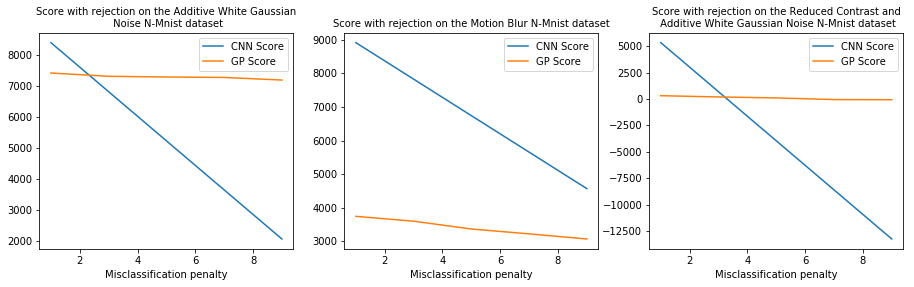

In [120]:
cnn_scores = [awgn_cnn_scores, mb_cnn_scores, rc_awgn_cnn_scores]
gp_scores = [awgn_gp_scores, mb_gp_scores, rc_awgn_gp_scores]
x = [1, 3, 5, 7, 9]
datasets = ['Additive White Gaussian\n Noise N-Mnist', 'Motion Blur N-Mnist', 'Reduced Contrast and\n Additive White Gaussian Noise N-Mnist']
labels = ['awgn', 'mb', 'rc+awgn']

with matplotlib.rc_context({'figure.figsize': [15, 3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, _ in enumerate(cnn_scores):
        ax = fig.add_subplot(1, 3, i+1)  # 2 rows of panels, 3 columns
        ax.plot(x, cnn_scores[i], label='CNN Score')
        ax.plot(x, gp_scores[i], label='GP Score')
        ax.legend()
#         ax.set_ylabel('Log Perplexity')
        ax.set_xlabel('Misclassification penalty')
        ax.set_title('Score with rejection on the {} dataset'.format(datasets[i]))
    fig.subplots_adjust(left=0.1, right=0.9, top=1.1, bottom=0.1)
    pylab.savefig('plots/rejection_scores.pdf', bbox_inches='tight')

## Variance

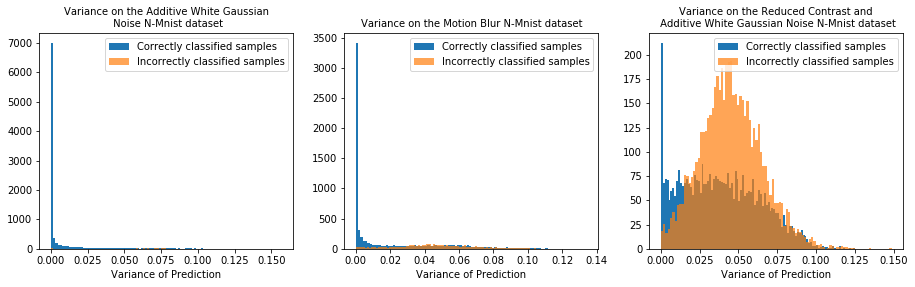

In [121]:
correct_variances = [correct_awgn_var, correct_mb_var, correct_rc_awgn_var]
wrong_variances = [wrong_awgn_var, wrong_mb_var, wrong_rc_awgn_var]
datasets = ['Additive White Gaussian\n Noise N-Mnist', 'Motion Blur N-Mnist', 'Reduced Contrast and\n Additive White Gaussian Noise N-Mnist']
labels = ['awgn', 'mb', 'rc+awgn']

with matplotlib.rc_context({'figure.figsize': [15, 3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, var in enumerate(variances):
        ax = fig.add_subplot(1, 3, i+1)  # 2 rows of panels, 3 columns
        ax.hist(correct_variances[i], label='Correctly classified samples'.format(labels[i]), bins=100, alpha=1)
        ax.hist(wrong_variances[i], label='Incorrectly classified samples'.format(labels[i]), bins=100, alpha=0.7)
        ax.legend()
#         ax.set_ylabel('Log Perplexity')
        ax.set_xlabel('Variance of Prediction')
        ax.set_title('Variance on the {} dataset'.format(datasets[i]))
    fig.subplots_adjust(left=0.1, right=0.9, top=1.1, bottom=0.1)
    pylab.savefig('plots/pred_var.pdf', bbox_inches='tight')

## CNN Model

In [ ]:
cnn_model = load_model('CNN_mnist_model.h5')

## GP Model

In [ ]:
gp_model = pickle.load( open( "GP_mnist_model.pkl", "rb" ) )
cnn_embedding_model = load_model('CNN_embedding_mnist_model.h5')

## Load Data

In [ ]:
num_classes = 10

In [ ]:
mat = scipy.io.loadmat('data/mnist-with-awgn.mat')

x_train = mat['train_x']
y_train = mat['train_y']

x_test = mat['test_x']
y_test = mat['test_y']

In [ ]:
def read_data(mat_file, num_classes):
    mat = scipy.io.loadmat(mat_file)

    x_train = mat['train_x']
    y_train = mat['train_y']

    x_test = mat['test_x']
    y_test = mat['test_y']
    
    # input image dimensions
    img_rows, img_cols = 28, 28

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print('y_train shape:', y_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    
    return x_test, y_test

## AWGN Data

In [ ]:
x_test, y_test = read_data('data/mnist-with-awgn.mat', num_classes)

In [ ]:
x_test[0]

In [ ]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

In [ ]:
h_test = cnn_embedding_model.predict(x_test)
y_test_num = np.array([np.argmax(y) for y in y_test])

In [ ]:
%%time
accuracy = gp_model.score(h_test, y_test_num)
print('GP Test accuracy:', accuracy)

## Motion Blur Data

In [ ]:
x_test, y_test = read_data('data/mnist-with-motion-blur.mat', num_classes)

In [ ]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

In [ ]:
h_test = cnn_embedding_model.predict(x_test)
y_test_num = np.array([np.argmax(y) for y in y_test])

In [ ]:
%%time
accuracy = gp_model.score(h_test, y_test_num)
print('GP Test accuracy:', accuracy)

## Reduced Contrast + AWGN Data

In [ ]:
x_test, y_test = read_data('data/mnist-with-reduced-contrast-and-awgn.mat', num_classes)

In [ ]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

In [ ]:
h_test = cnn_embedding_model.predict(x_test)
y_test_num = np.array([np.argmax(y) for y in y_test])

In [ ]:
%%time
accuracy = gp_model.score(h_test, y_test_num)
print('GP Test accuracy:', accuracy)

## Adversarial Attack

In [ ]:
from cleverhans.attacks import FastGradientMethod
from cleverhans.attacks import BasicIterativeMethod
from cleverhans.utils_keras import KerasModelWrapper
from keras import backend


In [ ]:
# Retrieve the tensorflow session
sess =  backend.get_session()

In [ ]:
# Initialize the Fast Gradient Sign Method (FGSM) attack object and 
# use it to create adversarial examples as numpy arrays.
wrap = KerasModelWrapper(cnn_model)
fgsm = FastGradientMethod(wrap, sess=sess)
fgsm_params = {'eps': 0.3,
               'clip_min': 0.,
               'clip_max': 1.}
adv_x = fgsm.generate_np(x_test, **fgsm_params)

In [ ]:
score = cnn_model.evaluate(adv_x, y_test, verbose=0)
print('CNN adversarial Test loss:', score[0])
print('CNN adversarial Test accuracy:', score[1])

In [ ]:
# Initialize the Fast Gradient Sign Method (FGSM) attack object and 
# use it to create adversarial examples as numpy arrays.
wrap = KerasModelWrapper(gp_model)
fgsm = FastGradientMethod(wrap, sess=sess)
fgsm_params = {'eps': 0.3,
               'clip_min': 0.,
               'clip_max': 1.}
adv_x = fgsm.generate_np(h_test, **fgsm_params)